In [2]:
from utils import gen_dataset
from utils import treine
from utils import Eval_metric
from utils import predict
import torch
from modelo import Linear
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import sys as s
import warnings
warnings.filterwarnings('ignore')

## Definições do dataset

No dataset há dois tipos de exemplos, um deles é composto por $$part_1=[y_1,..,y_{30}],$$ ou seja, a primeira parte do gráfico com $$label_1=[0].$$ 

O outro tipo de exemplo de treino é a segunda parte do intervalo $$part_2=[y_{d-30},...,y_d]$$ com $$label_2=[1].$$

### Entenda o dataset usando a função gen_dataset

Rodando a função obten-se uma explicação de como salvamos através de pickle os objetos de treino e teste:

$$DATASET = \begin{cases}
&TREINO:\begin{cases}&INPUT\_TRAIN\\&TRAIN\_LABELS\end{cases}\\
&TESTE:\begin{cases}&{INPUT\_TEST}\\&TEST\_LABELS\end{cases}
\end{cases}
$$

In [2]:
Input, Output, Input_test, Output_test = gen_dataset(5, True)


Nosso dataset possui 45 gráficos que representam o sinal de uma célula até completar a mitose
Cada gráfico gera dois exemplos de treino, então o nosso dataset tem tamanho 90. 
Atribuimos o objetivo de obter 0 quando o gráfico for de inicio de intervalo e 1 quando for da parte final.
--------------------------------------------------------------------------------------------------
Montando o dataset de entrada (Input) e um valor correto(target) de saída (Output) :
np.shape(Input) =  (50, 30) : os 50 primeiros gráficos de intervalo  30.
np.shape(Output) =  (50,) : o vetor de 50 valores corretos, que segundo a organização do dataset, é composto de [0,1,0,1,...]
np.shape(Input_Test) (40, 30) : os últimos 40 gráficos de intervalo  30.
np.shape(Output_Test) (40,) : o vetor de 40 valores corretos é composto de [0,1,0,1,...]
Separando o dataset em grupos de 10, ou seja, batch_size = 10. O dataset fica pronto para realizar o treino
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5,

In [13]:
def eval_model(proportion, epochs):
    y1 = []
    y2 = []
    _, _, inp, out = gen_dataset(proportion, False)
    model = Linear()
    #erro, acerto = Eval_metric(model, 'test')
    #print('antes de treinar o modelo acertou {} do conjunto de teste'.format(acerto))
    #print('antes de treinar o modelo errou {} do conjunto de teste'.format(erro))
    acerto_test, acerto_trein, Epochs = treine(model, epochs)
    plt.plot(Epochs, acerto_test, label='acurácia-teste')
    plt.plot(Epochs, acerto_trein, label='acurácia-treino')
    plt.legend()
    plt.xlabel('Epocas de treino')
    plt.suptitle('Acurácia treinando com {} exemplos'.format((proportion)*10))
    plt.title('E usando {} exemplos de teste'.format((9-proportion)*10))
    plt.show()


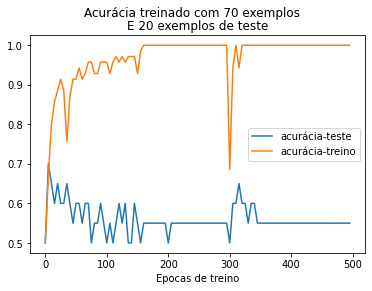

In [8]:
eval_model(7,500)

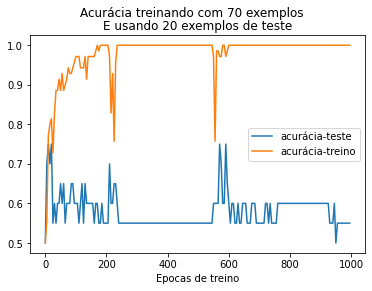

In [14]:
eval_model(7,1000)

In [13]:
from utils import Get_Dataset_real
import numpy as np

model = Linear()
Y = Get_Dataset_real()
np.random.shuffle(Y)
print(type(Y))
Input, Output, Input_test, Output_test = gen_dataset(7, False)

acerto_test,acerto_trein,Epochs = treine(model,20)
print(acerto_test)
print(acerto_trein)


<class 'list'>


TypeError: 'NoneType' object is not iterable

In [ ]:
predict(model,inp,out,n_batch, batch_idx)

In [ ]:
def predict(model,inp,out,n_batch, batch_idx):
    O = inp[n_batch]
    #y = 1*O[batch_idx]
    #x = np.linspace(0, len(y), len(y))
    #plt.plot(x, y)
    #plt.show()
    A = out[n_batch]
    O = O.float()
    A = A.float()
    resposta = model(O)
    print('---------------------------------------------')
    #print('---------------------------------------------')
    #print('O modelo foi criado para dar como resultado: ')
    print('* 0 quando for a primeira metade do gráfico')
    print('* 1 quando for a segunda metade do gráfico')
    print('Para o exemplo de indice {}, o resultado foi'.format([n_batch,batch_idx]))
    print('resposta do modelo = ', resposta[batch_idx].item())
    print('resposta correta = ', A[batch_idx].item())
    #print('---------------------------------------------')
    print('---------------------------------------------')